We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please go to the Unix shell and type:

`sudo pip install -U pandas`

It will take a few minutes to get everything installed.

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
plt.rcParams['figure.figsize'] = (15, 5)

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [4]:
# !curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156M  100  156M    0     0  13.0M      0  0:00:12  0:00:12 --:--:-- 16.7M


In [5]:
!head -5 data/restaurant.csv

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
41627869,EAST MEETS WEST,QUEENS,6507,WOODHAVEN BOULEVARD,11374,7188309788,Chinese,09/23/2014,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,Not Critical,10,A,09/23/2014,07/05/2016,Cycle Inspection / Initial Inspection
41237535,PAPA JOHN'S,BROOKLYN,1701,RALPH AVENUE,11236,7182517272,Pizza,05/28/2014,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2,A,05/28/2014,07/05/2016,Cycle Ins

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [6]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [7]:
restaurants.head(25)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41627869,EAST MEETS WEST,QUEENS,6507,WOODHAVEN BOULEVARD,11374,7188309788,Chinese,09/23/2014,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10,A,09/23/2014,07/05/2016,Cycle Inspection / Initial Inspection
1,41237535,PAPA JOHN'S,BROOKLYN,1701,RALPH AVENUE,11236,7182517272,Pizza,05/28/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,05/28/2014,07/05/2016,Cycle Inspection / Initial Inspection
2,41652560,$1 PIZZA $2 BEER,MANHATTAN,95,MACDOUGAL STREET,10012,2122555090,Pizza,09/05/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,10,A,09/05/2013,07/05/2016,Cycle Inspection / Re-inspection
3,50044147,GUESTHOUSE RETSAURANT,BROOKLYN,282,BRIGHTON BEACH AVE,11235,7188913111,Eastern European,02/11/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11,A,02/11/2016,07/05/2016,Pre-permit (Operational) / Initial Inspection
4,50035684,VSPOT ORGANIC,MANHATTAN,12,SAINT MARKS PL,10003,2122543693,"Latin (Cuban, Dominican, Puerto Rican, South &...",01/26/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20,NaN,NaN,07/05/2016,Cycle Inspection / Initial Inspection
5,41614537,FLAMING SADDLES SALOON,MANHATTAN,793,9 AVENUE,10019,2127130481,American,04/29/2013,Violations were cited in the following area(s).,08B,Covered garbage receptacle not provided or ina...,Not Critical,9,A,04/29/2013,07/05/2016,Cycle Inspection / Re-inspection
6,41108575,SOHO BISTRO,QUEENS,0,JFK INTERNATIONAL AIRPORT,11430,7186561012,American,07/22/2014,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,23,B,07/22/2014,07/05/2016,Cycle Inspection / Re-inspection
7,41336125,GRAND 1 BAKERY,MANHATTAN,295,GRAND STREET,10002,2123346968,Bakery,11/18/2013,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,7,NaN,NaN,07/05/2016,Cycle Inspection / Compliance Inspection
8,41509909,BILL'S BAR & BURGER ROCKEFELLER CENTER,MANHATTAN,45,ROCKEFELLER CENTER,10020,2127058510,American,02/23/2013,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,19,NaN,NaN,07/05/2016,Cycle Inspection / Initial Inspection
9,41519679,RIVERDALE SECOND HELPING,BRONX,3532,JOHNSON AVENUE,10463,7185481818,Jewish/Kosher,10/22/2013,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,29,NaN,NaN,07/05/2016,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [8]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,451630,451157,451630,451512,451630,451630,451550,451630,451630,450472,443057,442840,451630,421935,212904,211527,451630,450472
unique,25853,20236,6,7209,3301,227,24540,84,1298,5,96,94,3,121,6,1225,1,33
top,41289382,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,05/28/2015,07/05/2016,Cycle Inspection / Initial Inspection
freq,98,4699,179935,2960,16950,12551,302,104735,1158,428303,61621,61621,247358,40179,160587,526,451630,252175


We can also check the data types for each column

In [9]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [10]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [11]:
restaurants[["SCORE"]].describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,SCORE
count,421935.000000
mean,19.424888
std,13.022388
min,-2.000000
25%,NaN
50%,NaN
75%,NaN
max,156.000000


In [12]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")

In [13]:
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")

In [14]:
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [15]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,451630,211527,451630
unique,1298,1225,1
top,1900-01-01 00:00:00,2015-05-28 00:00:00,2016-07-05 00:00:00
freq,1158,526,451630
first,1900-01-01 00:00:00,2011-10-07 00:00:00,2016-07-05 00:00:00
last,2016-07-02 00:00:00,2016-07-02 00:00:00,2016-07-05 00:00:00


In [16]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [17]:
restaurants.describe(include='all')

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,451630,451157,451630,451512,451630,451630,451550,451630,451630,450472,443057,442840,451630,421935.000000,205819,211527,451630,450472
unique,25853,20236,6,7209,3301,227,24540,84,1298,5,96,94,3,NaN,3,1225,1,33
top,41289382,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2015-05-28 00:00:00,2016-07-05 00:00:00,Cycle Inspection / Initial Inspection
freq,98,4699,179935,2960,16950,12551,302,104735,1158,428303,61621,61621,247358,NaN,160587,526,451630,252175
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-07 00:00:00,2016-07-05 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-02 00:00:00,2016-07-05 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.424888,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.022388,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [18]:
restaurants["VIOLATION CODE"].head(5)

0    08A
1    10F
2    04N
3    08A
4    08A
Name: VIOLATION CODE, dtype: category
Categories (96, object): [02A, 02B, 02C, 02D, ..., 22E, 22F, 22G, 99B]

In [19]:
restaurants[["GRADE DATE","VIOLATION CODE", "DBA"]].head(25)

,GRADE DATE,VIOLATION CODE,DBA
0,2014-09-23,08A,EAST MEETS WEST
1,2014-05-28,10F,PAPA JOHN'S
2,2013-09-05,04N,$1 PIZZA $2 BEER
3,2016-02-11,08A,GUESTHOUSE RETSAURANT
4,NaT,08A,VSPOT ORGANIC
5,2013-04-29,08B,FLAMING SADDLES SALOON
6,2014-07-22,04N,SOHO BISTRO
7,NaT,10E,GRAND 1 BAKERY
8,NaT,06D,BILL'S BAR & BURGER ROCKEFELLER CENTER
9,NaT,02B,RIVERDALE SECOND HELPING


We can also get quick statistics about the common values that appear in each column:

In [20]:
restaurants["DBA"].value_counts()

DUNKIN' DONUTS                               4699
SUBWAY                                       4490
MCDONALD'S                                   3630
STARBUCKS                                    2326
DUNKIN' DONUTS, BASKIN ROBBINS               1767
CROWN FRIED CHICKEN                          1544
DOMINO'S                                     1451
BURGER KING                                  1375
KENNEDY FRIED CHICKEN                        1271
GOLDEN KRUST CARIBBEAN BAKERY & GRILL        1087
POPEYES LOUISIANA KITCHEN                    1050
CHIPOTLE MEXICAN GRILL                        972
PAPA JOHN'S                                   633
WENDY'S                                       591
KFC                                           545
LITTLE CAESARS                                483
AU BON PAIN                                   482
CARVEL ICE CREAM                              481
HALE & HEARTY SOUP                            392
PRET A MANGER                                 379


In [21]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            104735
Chinese                                                              49658
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     21617
Pizza                                                                21355
Italian                                                              21264
Mexican                                                              16628
Japanese                                                             16088
CafÃ©/Coffee/Tea                                                     15800
Bakery                                                               14072
Caribbean                                                            14043
Spanish                                                              13314
Pizza/Italian                                                         9594
Delicatessen                                                          7237
Chicken                  

In [22]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    61621
08A    42822
02G    35384
04L    31510
06D    27734
06C    25919
10B    24357
02B    21693
04N    19449
04H    11186
Name: VIOLATION CODE, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

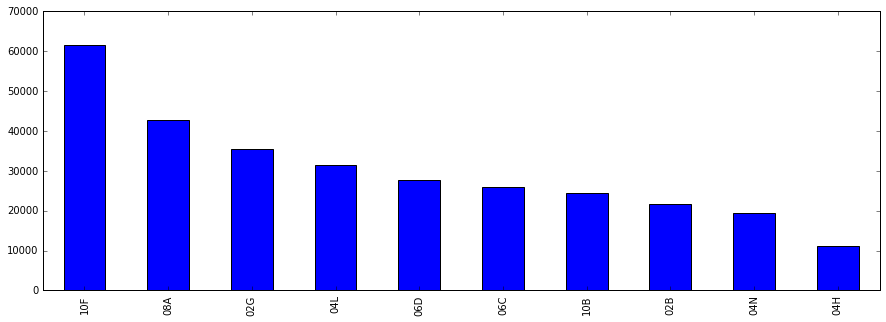

In [23]:
violation_counts[:10].plot(kind='bar')

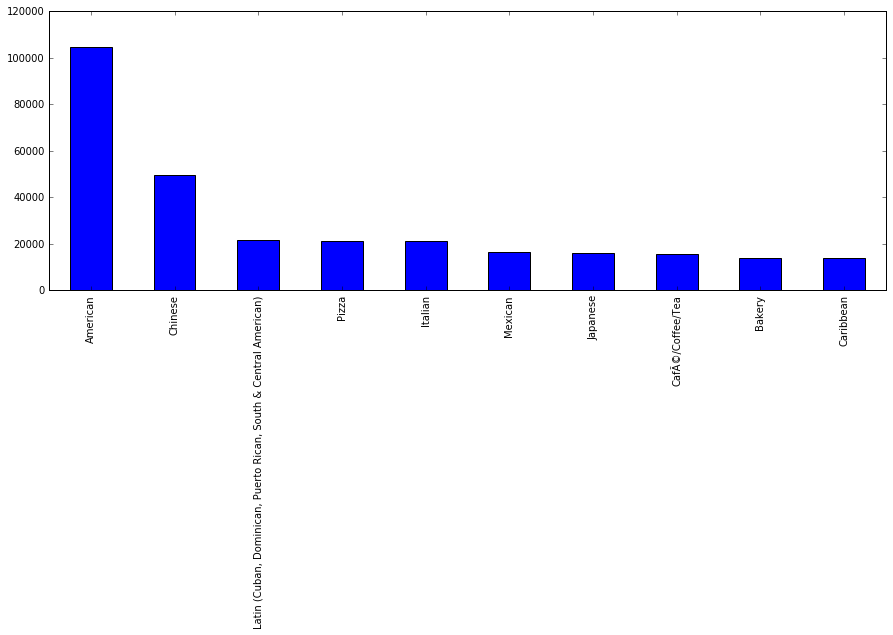

In [24]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [43]:
def capitalize(x):
    return x[0].upper() + x[1:].lower()

example = map(capitalize, ["panos", "christopher", "caterina", "lucy"])
list(example)

['Panos', 'Christopher', 'Caterina', 'Lucy']

In [44]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
list(example)

[10, 12, 13, 15]

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new columns that are the result of operations on the columns of the dataframe

For example, suppose that we want to format the phone column. We can write a function that takes as input a phone and formats it as we want. Then we apply the function using the map command as follows:

In [45]:
restaurants['PHONE']

0         7188309788
1         7182517272
2         2122555090
3         7188913111
4         2122543693
5         2127130481
6         7186561012
7         2123346968
8         2127058510
9         7185481818
10        2129666929
11        7186490016
12        6467070707
13        7188846267
14        3472754953
15        7185961083
16        7184751999
17        3477619138
18        2123983288
19        7184432272
20        7182220308
21        2122462030
22        6465598912
23        7183733888
24        7182320207
25        6462320129
26        2126251080
27        2129291085
28        7187206919
29        7183588855
             ...    
451600    2122292122
451601    2125805900
451602    2129968277
451603    7183875178
451604    2125981040
451605    7188240440
451606    2126846873
451607    7188533385
451608    7187485838
451609    7187334455
451610    7187453000
451611    2127279797
451612    7182220345
451613    7185236700
451614    2126757802
451615    7189182947
451616    212

In [57]:
import re
def formatPhone(phoneString):
    if phoneString == None:
        return ""
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        area_code = match.group(1)
        first_three = match.group(2)
        last_four = match.group(3)
        formatted = "(" + area_code + ") " + first_three + "-" + last_four
        return formatted
    else:
        return ""

In [58]:
formatPhone("2129980803")

'(212) 998-0803'

In [59]:
restaurants['FormattedPhone'] = restaurants['PHONE'].apply(formatPhone)

In [60]:
restaurants[['PHONE', 'FormattedPhone']]

,PHONE,FormattedPhone
0,7188309788,(718) 830-9788
1,7182517272,(718) 251-7272
2,2122555090,(212) 255-5090
3,7188913111,(718) 891-3111
4,2122543693,(212) 254-3693
5,2127130481,(212) 713-0481
6,7186561012,(718) 656-1012
7,2123346968,(212) 334-6968
8,2127058510,(212) 705-8510
9,7185481818,(718) 548-1818


In [67]:
def printAddress(boro, building, street, zipcode, phone):
    if boro == None:
        boro = ""
    if building == None:
        building = ""
    if street == None:
        street = ""
    if zipcode == None:
        zipcode = ""
    if phone == None:
        phone = ""
    
    result = str(building) + " " + street + " " + \
            boro + ", " + zipcode +  ", Phone: " + formatPhone(phone)
    return result

printAddress("Manhattan", "44", "West 4th", "10012", "2129980803")


'44 West 4th Manhattan, 10012, Phone: (212) 998-0803'

In [68]:

restaurants["FormattedAddress"] = list(map(printAddress, 
                                     restaurants["BORO"],
                                     restaurants["BUILDING"],
                                     restaurants["STREET"],
                                     restaurants["ZIPCODE"],
                                     restaurants["PHONE"]))

In [69]:
restaurants[["FormattedAddress", "STREET", "BUILDING", "BORO"]]


,FormattedAddress,STREET,BUILDING,BORO
0,"6507 WOODHAVEN BOULEVARD QUEENS, 11374, Phone:...",WOODHAVEN BOULEVARD,6507,QUEENS
1,"1701 RALPH AVENUE BROOKLYN, 11236, Phone: (718...",RALPH AVENUE,1701,BROOKLYN
2,"95 MACDOUGAL STREET MANHATTAN, 10012, Phone: (...",MACDOUGAL STREET,95,MANHATTAN
3,"282 BRIGHTON BEACH AVE BROOKLYN, 11235, Phone:...",BRIGHTON BEACH AVE,282,BROOKLYN
4,"12 SAINT MARKS PL MANHATTAN, 10003, Phone: (21...",SAINT MARKS PL,12,MANHATTAN
5,"793 9 AVENUE MANHATTAN, 10019, Phone: (212) 71...",9 AVENUE,793,MANHATTAN
6,"0 JFK INTERNATIONAL AIRPORT QUEENS, 11430, Pho...",JFK INTERNATIONAL AIRPORT,0,QUEENS
7,"295 GRAND STREET MANHATTAN, 10002, Phone: (212...",GRAND STREET,295,MANHATTAN
8,"45 ROCKEFELLER CENTER MANHATTAN, 10020, Phone:...",ROCKEFELLER CENTER,45,MANHATTAN
9,"3532 JOHNSON AVENUE BRONX, 10463, Phone: (718)...",JOHNSON AVENUE,3532,BRONX


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [70]:
# Create the condition
is_08A = (restaurants["VIOLATION CODE"] == "08A")
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called inspections08A
inspections08A = restaurants[is_08A]
inspections08A

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
0,41627869,EAST MEETS WEST,QUEENS,6507,WOODHAVEN BOULEVARD,11374,7188309788,Chinese,2014-09-23,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,2014-09-23,2016-07-05,Cycle Inspection / Initial Inspection,(718) 830-9788,"6507 WOODHAVEN BOULEVARD QUEENS, 11374, Phone:..."
3,50044147,GUESTHOUSE RETSAURANT,BROOKLYN,282,BRIGHTON BEACH AVE,11235,7188913111,Eastern European,2016-02-11,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,2016-02-11,2016-07-05,Pre-permit (Operational) / Initial Inspection,(718) 891-3111,"282 BRIGHTON BEACH AVE BROOKLYN, 11235, Phone:..."
4,50035684,VSPOT ORGANIC,MANHATTAN,12,SAINT MARKS PL,10003,2122543693,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-01-26,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 254-3693,"12 SAINT MARKS PL MANHATTAN, 10003, Phone: (21..."
11,41600223,FLAVA II,BROOKLYN,334,NEW LOTS AVENUE,11207,7186490016,Caribbean,2015-02-02,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(718) 649-0016,"334 NEW LOTS AVENUE BROOKLYN, 11207, Phone: (7..."
13,50001430,FOO-HING KITCHEN,BRONX,2895,SEDGWICK AVE,10468,7188846267,Chinese,2014-01-15,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(718) 884-6267,"2895 SEDGWICK AVE BRONX, 10468, Phone: (718) 8..."
19,40924394,XING LUNG CHINESE RESTAURANT,BROOKLYN,155,HOWARD AVENUE,11233,7184432272,Chinese,2015-10-17,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,18.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(718) 443-2272,"155 HOWARD AVENUE BROOKLYN, 11233, Phone: (718..."
26,41301933,EAST BROADWAY RESTAURANT,MANHATTAN,94,EAST BROADWAY,10002,2126251080,Chinese,2015-03-06,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,17.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 625-1080,"94 EAST BROADWAY MANHATTAN, 10002, Phone: (212..."
31,41387509,NANA RESTAURANT & BAR,BROOKLYN,155,5 AVENUE,11217,7182303768,Asian,2013-02-27,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,16.0,B,2013-02-27,2016-07-05,Cycle Inspection / Re-inspection,(718) 230-3768,"155 5 AVENUE BROOKLYN, 11217, Phone: (718) 230..."
45,50007121,SLICE OF BROOKLYN INC.,BROOKLYN,849,4TH AVE,11232,7184992121,Pizza,2015-09-17,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(718) 499-2121,"849 4TH AVE BROOKLYN, 11232, Phone: (718) 499-..."
62,41667113,SWEET EXPRESSIONS,BROOKLYN,310,KINGSTON AVENUE,11213,7186130188,"Ice Cream, Gelato, Yogurt, Ices",2015-11-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,2015-11-05,2016-07-05,Cycle Inspection / Re-inspection,(718) 613-0188,"310 KINGSTON AVENUE BROOKLYN, 11213, Phone: (7..."


In [71]:
# List the most frequent DBA values in the inspections08A dataframe
inspections08A["DBA"].value_counts()[:10]

SUBWAY                            376
MCDONALD'S                        369
DUNKIN' DONUTS                    341
CROWN FRIED CHICKEN               182
DOMINO'S                          165
STARBUCKS                         162
DUNKIN' DONUTS, BASKIN ROBBINS    162
KENNEDY FRIED CHICKEN             150
BURGER KING                       148
POPEYES LOUISIANA KITCHEN         140
Name: DBA, dtype: int64

And we can use more complex conditions:

In [72]:
is_08A_manhattan = (restaurants["VIOLATION CODE"] == "08A") \
                    & (restaurants["BORO"] == "MANHATTAN")

In [73]:
inspections08A_in_manhattan = restaurants[is_08A_manhattan]
inspections08A_in_manhattan

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
4,50035684,VSPOT ORGANIC,MANHATTAN,12,SAINT MARKS PL,10003,2122543693,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-01-26,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 254-3693,"12 SAINT MARKS PL MANHATTAN, 10003, Phone: (21..."
26,41301933,EAST BROADWAY RESTAURANT,MANHATTAN,94,EAST BROADWAY,10002,2126251080,Chinese,2015-03-06,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,17.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 625-1080,"94 EAST BROADWAY MANHATTAN, 10002, Phone: (212..."
84,50001547,THE WINSLOW,MANHATTAN,243,E 14TH ST,10003,2127777717,American,2015-02-11,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,30.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 777-7717,"243 E 14TH ST MANHATTAN, 10003, Phone: (212) 7..."
94,40379890,O'HARA'S,MANHATTAN,120,CEDAR STREET,10006,2122673032,American,2014-11-08,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,B,2014-11-08,2016-07-05,Cycle Inspection / Re-inspection,(212) 267-3032,"120 CEDAR STREET MANHATTAN, 10006, Phone: (212..."
110,40593528,BLOCKHEADS,MANHATTAN,322,WEST 50 STREET,10019,2123077029,Mexican,2013-08-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 307-7029,"322 WEST 50 STREET MANHATTAN, 10019, Phone: ..."
118,41040475,GRAMERCY ALE HOUSE,MANHATTAN,272,3 AVENUE,10010,2122601129,American,2014-03-06,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,16.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 260-1129,"272 3 AVENUE MANHATTAN, 10010, Phone: (212) 26..."
122,41633762,PRODIGY COFFEE,MANHATTAN,33,CARMINE STREET,10014,2124144142,CafÃ©/Coffee/Tea,2014-01-21,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,16.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 414-4142,"33 CARMINE STREET MANHATTAN, 10014, Phone: (21..."
158,50003732,ALL'ONDA,MANHATTAN,22,E 13TH ST,10003,2122312236,Italian,2014-04-28,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,28.0,C,2014-04-28,2016-07-05,Cycle Inspection / Re-inspection,(212) 231-2236,"22 E 13TH ST MANHATTAN, 10003, Phone: (212) 23..."
198,41475945,SZECHUAN GOURMET,MANHATTAN,242,WEST 56 STREET,10019,2122652226,Chinese,2015-09-11,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,26.0,NaN,NaT,2016-07-05,Cycle Inspection / Initial Inspection,(212) 265-2226,"242 WEST 56 STREET MANHATTAN, 10019, Phone: ..."
207,41603124,LUCKY SEVEN TAPAS BAR,MANHATTAN,1455,ST NICHOLAS AVENUE,10033,2127407777,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-06-25,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,2016-06-25,2016-07-05,Cycle Inspection / Re-inspection,(212) 740-7777,"1455 ST NICHOLAS AVENUE MANHATTAN, 10033, Phon..."


In [74]:
inspections08A_in_manhattan["DBA"].value_counts()[:10]

SUBWAY                            135
MCDONALD'S                        121
STARBUCKS                         118
DUNKIN' DONUTS                    101
CHIPOTLE MEXICAN GRILL             60
DUNKIN' DONUTS, BASKIN ROBBINS     51
DOMINO'S                           48
POPEYES LOUISIANA KITCHEN          34
HALE & HEARTY SOUP                 30
AMC THEATRES                       25
Name: DBA, dtype: int64

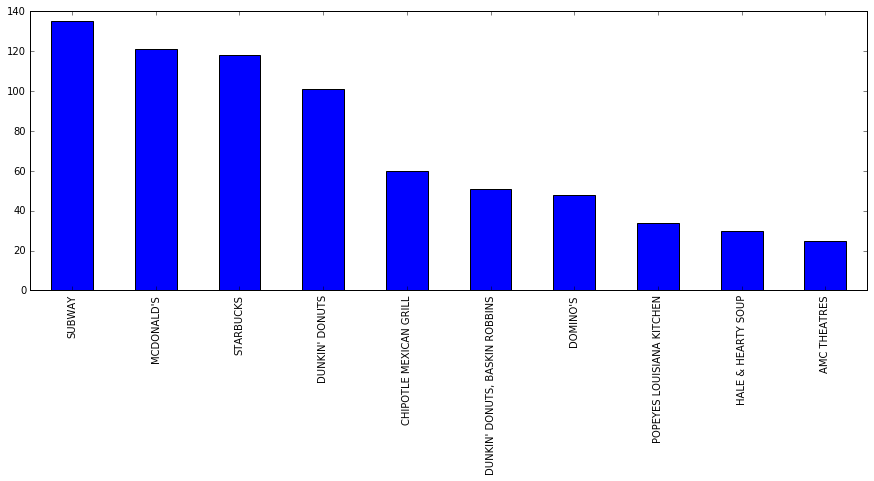

In [75]:
inspections08A_in_manhattan["DBA"].value_counts()[:10].plot(kind='bar')

In [76]:
restaurants[["VIOLATION CODE", "VIOLATION DESCRIPTION"]]

,VIOLATION CODE,VIOLATION DESCRIPTION
0,08A,Facility not vermin proof. Harborage or condit...
1,10F,Non-food contact surface improperly constructe...
2,04N,Filth flies or food/refuse/sewage-associated (...
3,08A,Facility not vermin proof. Harborage or condit...
4,08A,Facility not vermin proof. Harborage or condit...
5,08B,Covered garbage receptacle not provided or ina...
6,04N,Filth flies or food/refuse/sewage-associated (...
7,10E,Accurate thermometer not provided in refrigera...
8,06D,"Food contact surface not properly washed, rins..."
9,02B,Hot food item not held at or above 140Âº F.


### Plotting

In [77]:
# We need to convert the "SCORE" column to a numeric data type (just in case the related part was not executed above)
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

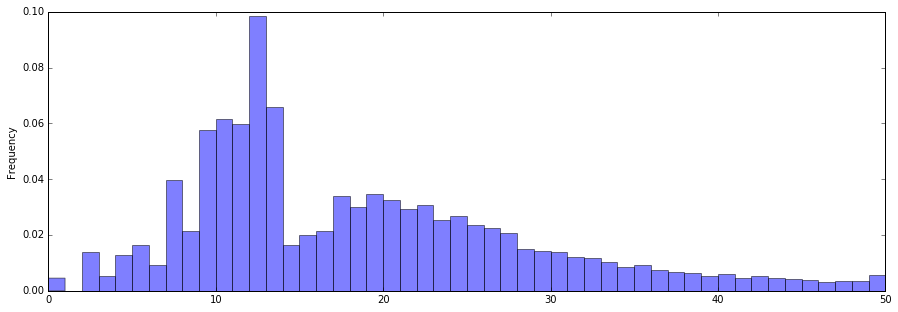

In [78]:
# We can plot a histogram of the scores using the plot(kind='hist') command
restaurants["SCORE"].plot(kind='hist', 
                          bins=50, 
                          alpha=0.5, 
                          range=(0,50), 
                          color='Blue', 
                          normed=True)

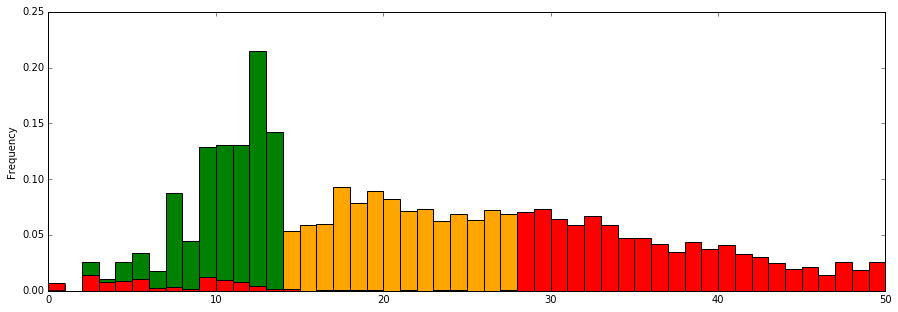

In [79]:
# We can also select specific rows to plot (e.g., in this case based on grade)
# Jupyter is smart enough to combine these three plots in one 
# (sometimes it is not smart, below we show how to make our desire to combine plots explicit)
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', bins=50, range=(0,50), color='Green', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', bins=50, range=(0,50), color='Orange', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', bins=50, range=(0,50), color='Red', normed=True)

In [ ]:
# This plots the density of a numeric attribute
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))

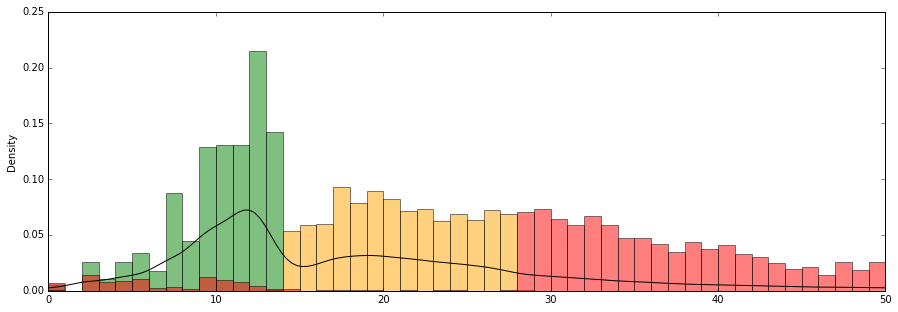

In [81]:
ax1 = restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Green', normed=True)
ax2 = restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Orange', normed=True, ax=ax1)
ax3 = restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Red', normed=True, ax=ax2)
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50), ax=ax3)

### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [ ]:
# !sudo -H pip install -U pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [ ]:
rest = restaurants[["DBA", "BORO", "VIOLATION", "SCORE"]]

In [ ]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  rest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
q  = """
SELECT SCORE, COUNT(*) AS CNT 
FROM
  rest
WHERE SCOR
GROUP BY SCORE
ORDER BY SCORE

"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
df.plot(kind='scatter', s=50, x="SCORE", y="CNT", xlim=(0,30))